In [1]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
import jax
from models.manual_implementations.glycolysis.glycolysis_model import *

jax.config.update("jax_enable_x64", True)
from scripts.analysis_helper_functions.helper_function_glycolysis_analysis import (
    prepare_glycolysis_model,
    update_parameters_by_dilution_rate,
)

/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes
n_parameters 141


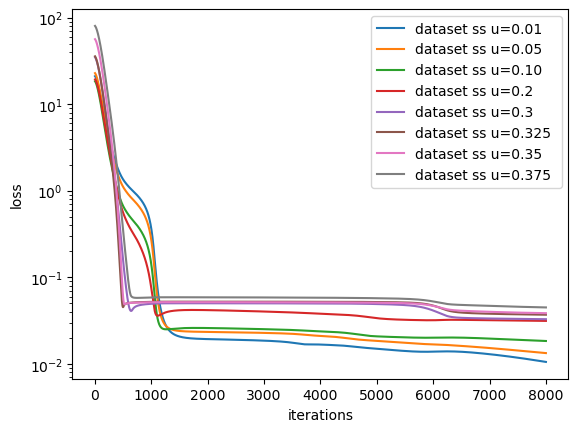

In [2]:
losses = pd.read_csv(
    "results/EXP4_Glycolysis_Fitting_Datasets/1509_losses_ss_datasets_literature_parameter_init.csv", index_col=0
)


plt.plot(losses["loss_per_iter2"], label="dataset ss u=0.01")
plt.plot(losses["loss_per_iter3"], label="dataset ss u=0.05")
plt.plot(losses["loss_per_iter4"], label="dataset ss u=0.10 ")
plt.plot(losses["loss_per_iter5"], label="dataset ss u=0.2")
plt.plot(losses["loss_per_iter6"], label="dataset ss u=0.3 ")
plt.plot(losses["loss_per_iter7"], label="dataset ss u=0.325")
plt.plot(losses["loss_per_iter8"], label="dataset ss u=0.35 ")
plt.plot(losses["loss_per_iter9"], label="dataset ss u=0.375 ")
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.yscale("log")

In [60]:
trained_parameters = pd.read_csv(
    "results/EXP4_Glycolysis_Fitting_Datasets/1509_trained_params_ss_datasets_literature_parameter_init.csv", index_col=0
).to_dict()["0"]

# expression data that is used to update the parameters that are dilution rate dependent
expression_data = pd.read_csv("datasets/VanHeerden_Glucose_Pulse/PvanHoekExpressionData.csv", index_col=0)

column_pairs = [
    ("D_HXK", "HXK"),
    ("D_PGI", "PGI"),
    ("D_PFK", "PFK"),
    ("D_FBA", "FBA"),
    ("D_TPI", "TPI"),
    ("D_GAPDH", "GAPDH"),
    ("D_PGK", "PGK"),
    ("D_PGM", "PGM"),
    ("D_ENO", "ENO"),
    ("D_PYK", "PYK"),
    ("D_PDC", "PDC"),
    ("D_ADH", "ADH"),
]

interpolation_expression_dict = {}

Ds = jnp.linspace(0, 0.375, 100)

for D_col, col in column_pairs:
    interp_key = f"expr_interpolated_{col}"
    interpolation_expression_dict[interp_key] = diffrax.LinearInterpolation(
        ts=jnp.array(expression_data[D_col]), ys=jnp.array(expression_data[col])
    )


trained_parameters_01 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.01)
trained_parameters_05 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.05)
trained_parameters_10 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.1)
trained_parameters_20 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.2)
trained_parameters_30 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.3)
trained_parameters_325 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.325)
trained_parameters_35 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.35)
trained_parameters_375 = update_parameters_by_dilution_rate(trained_parameters, interpolation_expression_dict, D=0.375)

In [61]:
init_params = pd.read_csv(
    "parameter_initializations/Glycolysis_model/parameter_initialization_glycolysis_literature_values.csv", index_col=0
).to_dict()["0"]

In [62]:
# use the initial dictionary

y0_dict = {
    "ICG1P": 0.064568,
    "ICT6P": 0.093705,
    "ICtreh": 63.312040,
    "ICglucose": 0.196003,
    "ICG6P": 0.716385,
    "ICF6P": 0.202293,
    "ICFBP": 0.057001,
    "ICDHAP": 0.048571,
    "ICG3P": 0.020586,
    "ICglyc": 0.1,
    "ICGAP": 0.006213,
    "ICBPG": 0.0001,
    "IC3PG": 2.311074,
    "IC2PG": 0.297534,
    "ICPEP": 1.171415,
    "ICPYR": 0.152195,
    "ICACE": 0.04,
    "ICETOH": 10.0,
    "ECETOH": 0,
    "ECglycerol": 0.0,
    "ICNADH": 0.0106,
    "ICNAD": 1.5794,
    "ICATP": 3.730584,
    "ICADP": 1.376832,
    "ICAMP": 0.431427,
    "ICPHOS": 10,
    "ICIMP": 0.100,
    "ICINO": 0.100,
    "ICHYP": 1.5,
}
y0 = jnp.array(list(y0_dict.values()))
metabolite_names = list(y0_dict.keys())

# prepare different models for each dilution rate and the glucose pulse
glycolyse_GP1, time_points_GP1, y0_GP1, dataset_GP1 = prepare_glycolysis_model(
    data_type="glucose_pulse", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_SS_01, time_points_SS_01, y0_SS_01, dataset_SS_01 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.02", y0_dict=y0_dict
)
glycolyse_SS_05, time_points_SS_05, y0_SS_05, dataset_SS_05 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.05", y0_dict=y0_dict
)
glycolyse_SS_10, time_points_SS_10, y0_SS_10, dataset_SS_10 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.1", y0_dict=y0_dict
)
glycolyse_SS_20, time_points_SS_20, y0_SS_20, dataset_SS_20 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.2", y0_dict=y0_dict
)
glycolyse_SS_30, time_points_SS_30, y0_SS_30, dataset_SS_30 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.3", y0_dict=y0_dict
)
glycolyse_SS_325, time_points_SS_325, y0_SS_325, dataset_SS_325 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.325", y0_dict=y0_dict
)
glycolyse_SS_35, time_points_SS_35, y0_SS_35, dataset_SS_35 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.35", y0_dict=y0_dict
)
glycolyse_SS_375, time_points_SS_375, y0_SS_375, dataset_SS_375 = prepare_glycolysis_model(
    data_type="steady_state", dilution_rate="0.375", y0_dict=y0_dict
)

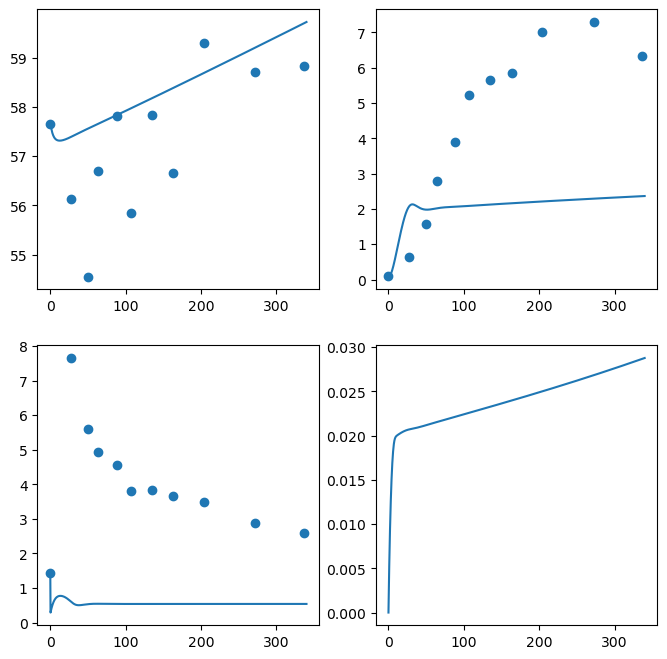

In [103]:
ts = jnp.linspace(0, 340, 1000)
trained_parameters_10["p_Amd1_Vmax"] = 9.8464
trained_parameters_10["p_Isn1_k"] = 0.3654
trained_parameters_10["p_Pnp1_k"] = 0.0149
trained_parameters_10["p_Hpt1_k"] = 0.0112
trained_parameters_10["p_ATPase_ratio"] = 0.23265
# # glycolyse_GP1.max_steps=500000

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ys_GP = glycolyse_GP1(ts, jnp.array(list(y0_GP1.values())), trained_parameters_10)
ys_GP = pd.DataFrame(ys_GP, columns=metabolite_names)
axs[0, 0].plot(ts, ys_GP["ICtreh"], label="trehalose")
axs[0, 0].scatter(time_points_GP1, dataset_GP1["ICtreh"], label="trehalose")
axs[0, 1].plot(ts, ys_GP["ICT6P"], label="t6p")
axs[0, 1].scatter(time_points_GP1, dataset_GP1["ICT6P"], label="t6p")
axs[1, 0].plot(ts, ys_GP["ICG6P"], label="ICG6P")
axs[1, 0].scatter(time_points_GP1, dataset_GP1["ICG6P"], label="ICG6P")
axs[1, 1].plot(ts, ys_GP["ECETOH"], label="ECETOH")


# plt.plot(ts,ys_GP['ICATP'],label="ICATP")
# plt.plot(ts,ys_GP['ICADP'],label="ICADP")
# plt.plot(ts,ys_GP['ICAMP'],label="ICAMP")
# plt.legend()

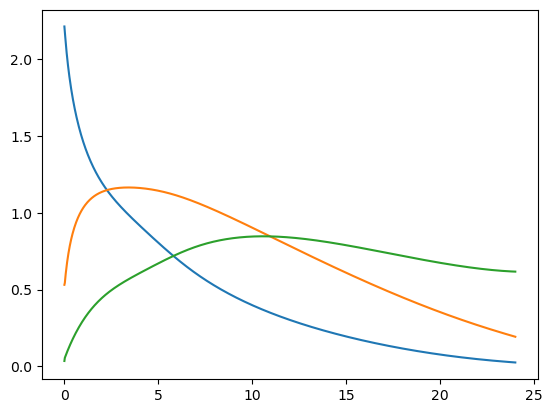

In [24]:
# plt.plot(ts,ys_GP['ICFBP'])
# plt.plot(ts,ys_GP['ICGAP'])
# plt.plot(ts,ys_GP['ICT6P'])
# plt.plot(ts,ys_GP['ICT6P'])

TypeError: JAX does not support string indexing; got idx=('ICG6P',)

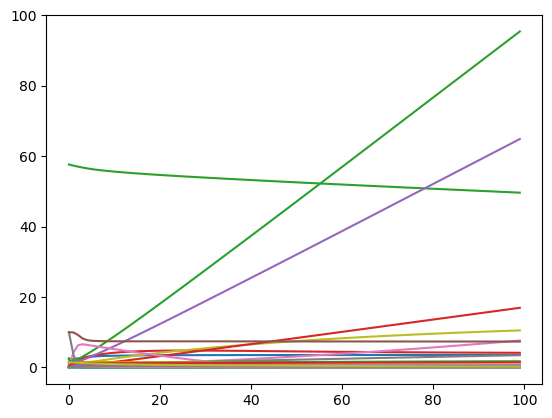

In [7]:
def give_steady_states(model, params_init, y0):
    ts = jnp.linspace(0, 6000, 1000)
    metabolite_names = list(y0.keys())
    ys_pred = model(ts, jnp.array(list(y0.values())), params_init)

    ys_final_steady_state = ys_pred[-1, :]
    ys_final_steady_state = dict(zip(metabolite_names, ys_final_steady_state))
    return ys_final_steady_state


D01_SS = give_steady_states(glycolyse_SS_10, trained_parameters_10, y0_SS_10)
D05_SS = give_steady_states(glycolyse_SS_05, trained_parameters_05, y0_SS_05)
D10_SS = give_steady_states(glycolyse_SS_10, trained_parameters_10, y0_SS_10)
D20_SS = give_steady_states(glycolyse_SS_20, trained_parameters_20, y0_SS_20)
D30_SS = give_steady_states(glycolyse_SS_30, trained_parameters_30, y0_SS_30)
D325_SS = give_steady_states(glycolyse_SS_325, trained_parameters_325, y0_SS_325)
D35_SS = give_steady_states(glycolyse_SS_35, trained_parameters_35, y0_SS_35)
D375_SS = give_steady_states(glycolyse_SS_375, trained_parameters_375, y0_SS_375)

In [8]:
from scipy.io import loadmat
# load the steady state data from the previous glycolysis model (joep)

steady_state_data_Joep = loadmat("datasets/VanHeerden_Glucose_Pulse/sim_Y3M1.mat")["sim_Y3M1"][0][0][0]["ss"]
steady_state_data_Joep = steady_state_data_Joep[0][0][0]["Y"]
met_names_joep = [
    "ICACE",
    "ICBPG",
    "ICFBP",
    "ICF6P",
    "ICG6P",
    "ICglucose",
    "ICNAD",
    "ICNADH",
    "ICATP",
    "IC2PG",
    "IC3PG",
    "ICPEP",
    "ICPYR",
    "ICGAP",
    "ICADP",
    "ICAMP",
    "ICDHAP",
    "ICG3P",
    "ICglyc",
    "ICETOH",
    "ICG1P",
    "ICUTP",
    "ICUDP",
    "ICUDP_GLC",
    "ICtreh",
    "ICT6P",
    "ICPHOS",
    "ICIMP",
    "ICINO",
    "ICHYP",
    "ECETOH",
    "ECglycerol",
]
Dilutions = [0.01, 0.05, 0.1, 0.2, 0.3, 0.325, 0.350, 0.375]
steady_state_data_Joep = steady_state_data_Joep[0][0]["ss2can"]
ss_conc_dict_joep = {}
for k, i in enumerate(Dilutions):
    ss_conc = pd.DataFrame(steady_state_data_Joep[k][0], columns=met_names_joep).iloc[-1, :].to_dict()
    ss_conc_dict_joep[str(i)] = ss_conc

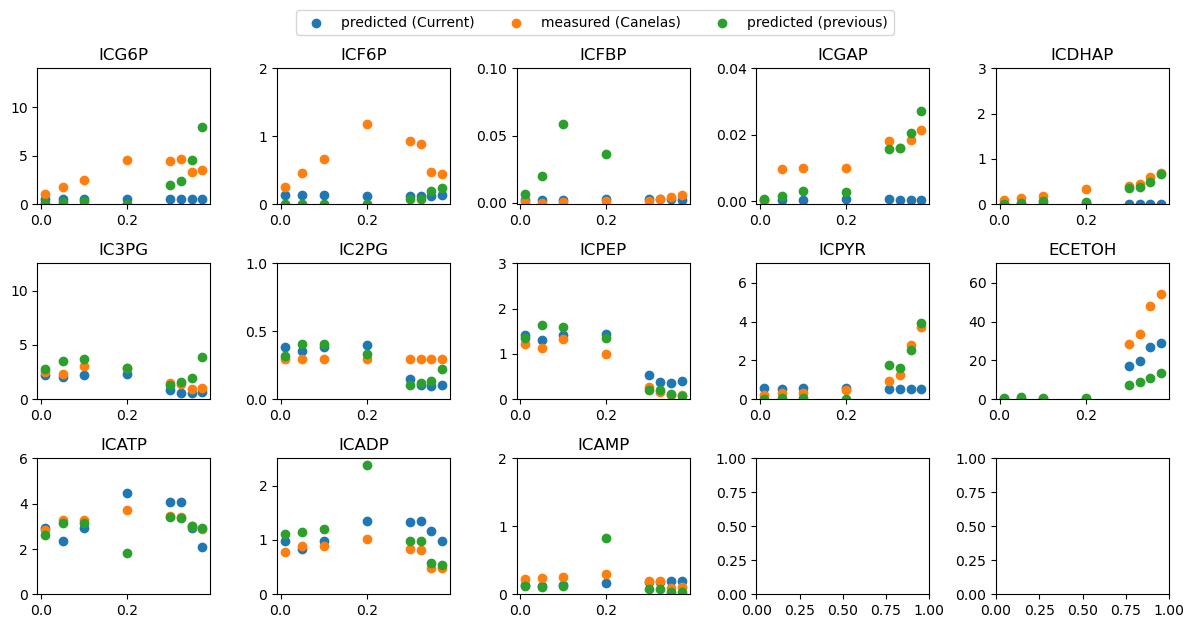

In [11]:
# Creating a 4x4 grid for the plots
maxes = [14, 2, 0.1, 0.04, 3, 12.5, 1, 3, 7, 70, 6, 2.5, 2]
fig, axs = plt.subplots(3, 5, figsize=(12, 6))
metabolites = [
    "ICG6P",
    "ICF6P",
    "ICFBP",
    "ICGAP",
    "ICDHAP",
    "IC3PG",
    "IC2PG",
    "ICPEP",
    "ICPYR",
    "ECETOH",
    "ICATP",
    "ICADP",
    "ICAMP",
]
# Loop through metabolites to generate plots
for i, metabolite in enumerate(metabolites):  # Adjust the range as necessary
    row, col = divmod(i, 5)
    ax = axs[row, col]

    measured = [
        y0_SS_01[metabolite],
        y0_SS_05[metabolite],
        y0_SS_10[metabolite],
        y0_SS_20[metabolite],
        y0_SS_30[metabolite],
        y0_SS_325[metabolite],
        y0_SS_35[metabolite],
        y0_SS_375[metabolite],
    ]

    SS_values = [
        D01_SS[metabolite],
        D05_SS[metabolite],
        D10_SS[metabolite],
        D20_SS[metabolite],
        D30_SS[metabolite],
        D325_SS[metabolite],
        D35_SS[metabolite],
        D375_SS[metabolite],
    ]

    SS_values_joep = [
        ss_conc_dict_joep["0.01"][metabolite],
        ss_conc_dict_joep["0.05"][metabolite],
        ss_conc_dict_joep["0.1"][metabolite],
        ss_conc_dict_joep["0.2"][metabolite],
        ss_conc_dict_joep["0.3"][metabolite],
        ss_conc_dict_joep["0.325"][metabolite],
        ss_conc_dict_joep["0.35"][metabolite],
        ss_conc_dict_joep["0.375"][metabolite],
    ]
    # if metabolite=="ECETOH":
    #     metabolite=="ICETOH"

    #     SS_values_joep=[ss_conc_dict_joep['0.01'][metabolite],ss_conc_dict_joep['0.05'][metabolite],ss_conc_dict_joep['0.1'][metabolite],
    #                     ss_conc_dict_joep['0.2'][metabolite],ss_conc_dict_joep['0.3'][metabolite],ss_conc_dict_joep['0.325'][metabolite],
    #                     ss_conc_dict_joep['0.35'][metabolite],ss_conc_dict_joep['0.375'][metabolite]]

    ax.scatter(Dilutions, SS_values, label="predicted (Current)")
    ax.scatter(Dilutions, measured, label="measured (Canelas)")
    ax.scatter(Dilutions, SS_values_joep, label="predicted (previous)")

    ax.set_title(metabolite)
    ax.set_ylim(-0.001, maxes[i])  # Adjust ylim dynamically'
    # Collect the handles and labels only once
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels, loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.05))

plt.tight_layout()
# plt.savefig("figures/figures_glycolysis/steady_state_concentations.png")
plt.show()

In [12]:
## Estimate a mse for between true and predicted for both and lets see if we can win a bet.
ss_dilutions_predicted = [D01_SS, D05_SS, D10_SS, D20_SS, D30_SS, D325_SS, D35_SS, D375_SS]
string_dilutions = [str(i) for i in Dilutions]
ss_dilutions_predicted = dict(zip(string_dilutions, ss_dilutions_predicted))


ss_dilutions_measured = [y0_SS_01, y0_SS_05, y0_SS_10, y0_SS_20, y0_SS_30, y0_SS_325, y0_SS_35, y0_SS_375]
ss_dilutions_measured = dict(zip(string_dilutions, ss_dilutions_measured))


mse_overall_ours = []
mse_overall_joeps = []
for m in metabolites:
    mse_per_meta = []
    mse_per_meta2 = []
    for k, i in enumerate(string_dilutions):
        d_true = ss_dilutions_measured[i][m]
        d_1 = ss_dilutions_predicted[i][m]
        d_2 = ss_conc_dict_joep[i][m]

        mse_per_meta.append((d_1 - d_true) ** 2)
        mse_per_meta2.append((d_2 - d_true) ** 2)
    mse_per_meta = np.mean(mse_per_meta)
    mse_per_meta2 = np.mean(mse_per_meta2)

    mse_overall_ours.append(mse_per_meta)
    mse_overall_joeps.append(mse_per_meta2)

In [13]:
np.sum(np.greater(mse_overall_ours, mse_overall_joeps))

6

In [15]:
ys = glycolyse_SS_01(ts, jnp.array(list(y0_SS_01.values())), params=trained_parameters_01)
y0_SS_30

{'ICG1P': 0.17,
 'ICT6P': 0.01,
 'ICtreh': 63.31204,
 'ICglucose': 0.196003,
 'ICG6P': 4.455,
 'ICF6P': 0.937,
 'ICFBP': 0.0013,
 'ICDHAP': 0.3915,
 'ICG3P': 0.04,
 'ICglyc': 0.1,
 'ICGAP': 0.018,
 'ICBPG': 0.0001,
 'IC3PG': 1.515,
 'IC2PG': 0.297534,
 'ICPEP': 0.265,
 'ICPYR': 0.915,
 'ICACE': 0.04,
 'ICETOH': 10.0,
 'ECETOH': 28.39,
 'ECglycerol': 0.0,
 'ICNADH': 0.0208115183246073,
 'ICNAD': 1.56918848167539,
 'ICATP': 3.454,
 'ICADP': 0.8315,
 'ICAMP': 0.1875,
 'ICPHOS': 10,
 'ICIMP': 0.1,
 'ICINO': 0.1,
 'ICHYP': 1.5}